In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

from HOTS.STS import STS
from HOTS.Event import Event
from HOTS.Monitor import DisplaySurface3D, DisplaySurface2D, DisplayImage
from HOTS.Layer import Filter
%matplotlib inline

## Filtering isolated events

chargement des images [35]


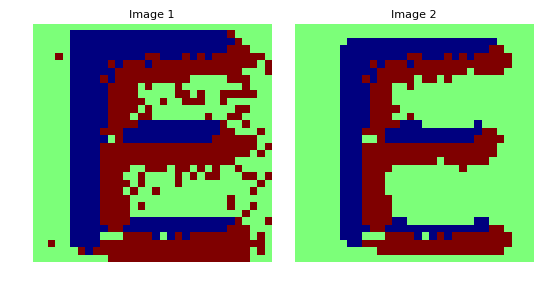

In [3]:

event0 = Event(ImageSize=(32,32), ListPolarities=[-1,1])

event0.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=35)

InputFilter = Filter(event0)
event1 = InputFilter.FilterNHBD(threshold=15,neighbourhood=2)

DisplayImage([event0,event1])

## Plotting the time Matrix

In [4]:
target_event = 10000

In [5]:
SpTe= STS(tau=0.02, R=2,verbose=1,initial_time=0)
Surface = SpTe.create(event = event1, stop = target_event)

Generation of SpatioTemporal Surface in ------ 0.20 s


In [6]:
w = SpTe.R + 1
x,y = event1.address[target_event, 0],event1.address[target_event, 1]
(x0, y0) = (x + SpTe.R - w, y + SpTe.R - w)
(x1, y1) = (x + SpTe.R + w, y + SpTe.R + w)

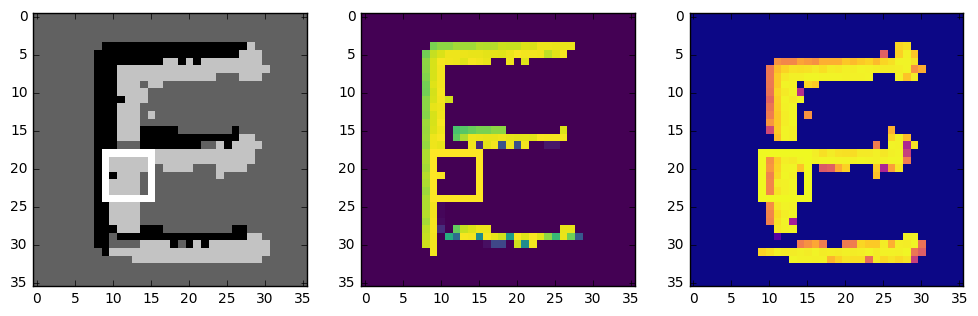

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
image = np.zeros((SpTe.width, SpTe.height))
image[event1.address[0:target_event+1, 0].T + SpTe.R, 
      event1.address[0:target_event+1, 1].T + SpTe.R] = event1.polarity[0:target_event+1].T
image1 = image.copy()
cv2.rectangle(image1, (y0, x0), (y1, x1),
              color=np.amax(image)+0.6)
#axs[0].axis('off')
axs[0].imshow(image1,cmap = plt.gray(),interpolation='nearest')

ImageTimeMat1 = SpTe.ListOfTimeMatrix[0, :, :]
cv2.rectangle(ImageTimeMat1, (y0, x0), (y1, x1),
              color=np.amax(ImageTimeMat1) + 0.001)
#axs[1].axis('off')
axs[1].imshow(ImageTimeMat1, cmap=plt.viridis(),interpolation='nearest')

ImageTimeMat2 = SpTe.ListOfTimeMatrix[1, :, :]
cv2.rectangle(ImageTimeMat2, (y0, x0), (y1, x1),
              color=np.amax(ImageTimeMat2) + 0.001)
#axs[2].axis('off')
axs[2].imshow(ImageTimeMat2, cmap=plt.plasma(),interpolation='nearest');

## Plotting the local time Matrix

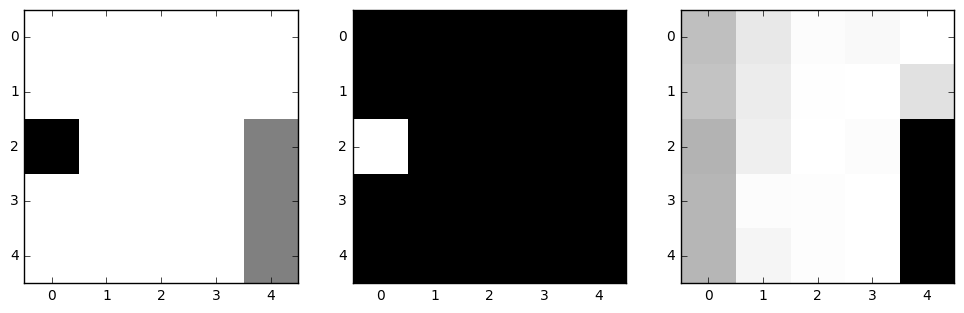

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
x_t, y_t = x + SpTe.R, y + SpTe.R

image_local = image[(x_t-SpTe.R):(x_t+SpTe.R+1), (y_t-SpTe.R):(y_t+SpTe.R+1)]
axs[0].imshow(image_local, cmap=plt.gray(), interpolation = "nearest")
axs[1].imshow(SpTe.LocalTimeMatrix[0, :, :], cmap=plt.gray(),interpolation = "nearest")
axs[2].imshow(SpTe.LocalTimeMatrix[1, :, :], cmap=plt.gray(), interpolation = "nearest");

## Plotting the Spatio Temporal Surfaces

(10001, 50)


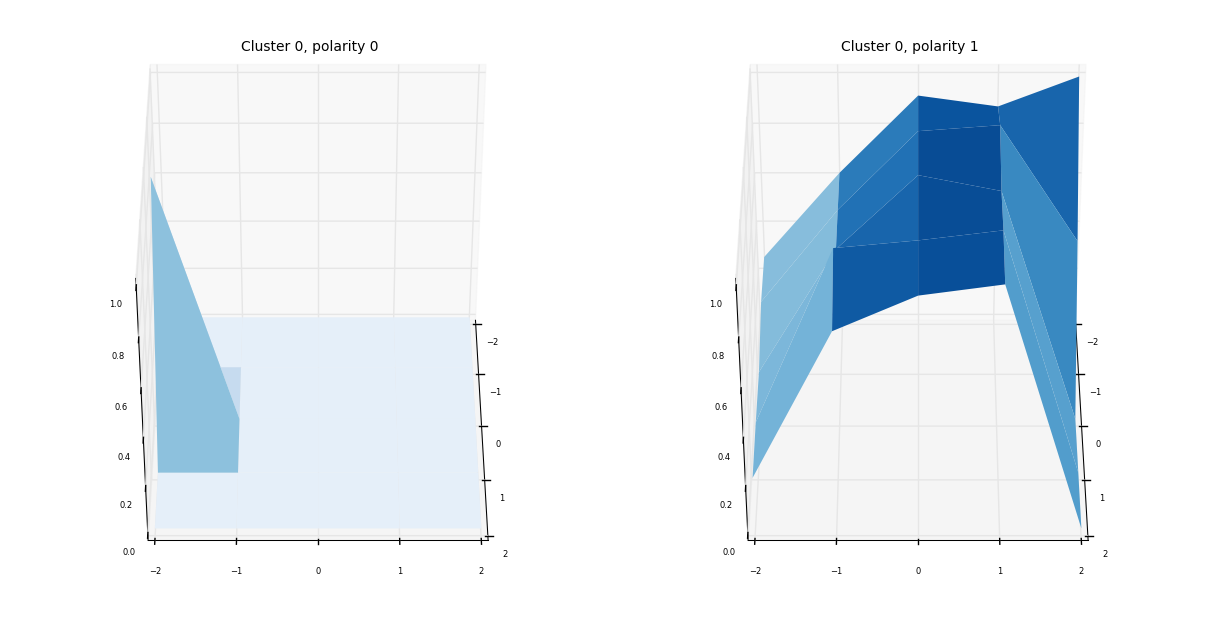

In [9]:
print(Surface.shape)
Surface_to_plot = Surface[-1,:][np.newaxis,:]

DisplaySurface3D(Surface_to_plot,nb_polarities=2,angle=(40,0))

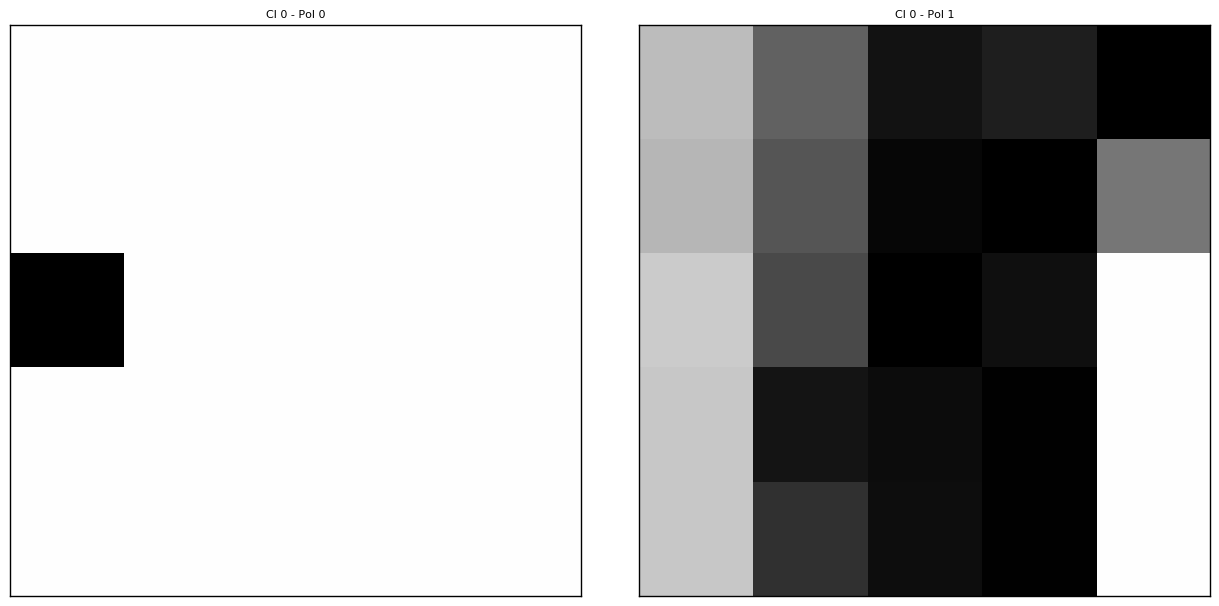

In [10]:
DisplaySurface2D(Surface_to_plot,nb_polarities=2)